<a href="https://colab.research.google.com/github/Abdulaziz1607/Challenge_Data/blob/main/Classification_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
seed = 7
np.random.seed(seed)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%cd drive/My Drive/Colab Notebooks/data_image
%ls

/content/drive/My Drive/Colab Notebooks/data_image
test/  train/


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

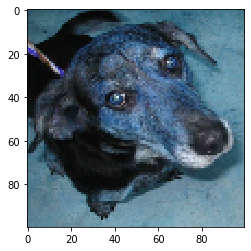

In [ ]:
categories = ['chien', 'chat']
for category in categories:
    path = os.path.join("train/",category)
    for img in os.listdir(path):
        img_read = cv2.imread(os.path.join(path, img))
        new_read = cv2.resize(img_read, (100, 100))
        plt.imshow(new_read)
        break
    break

In [ ]:
training_data = []
SIZE = 224
for category in categories:
    path = os.path.join("train/", category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try:
            img_read = cv2.imread(os.path.join(path, img))
            new_read = cv2.resize(img_read, (SIZE, SIZE))
            training_data.append([new_read, class_num])
        except Exception as e:
            pass

print(len(training_data))

410


In [ ]:
import random
random.shuffle(training_data)

In [ ]:
x = []
y = []
for features, label in training_data:
    x.append(features)
    y.append(label)

print(str(len(x)) + "  |  " + str(len(y)))

410  |  410


(410, 224, 224, 3)
(410,)


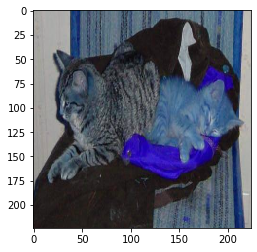

In [ ]:
x = np.array(x).reshape(-1, SIZE, SIZE, 3)
print(x.shape)
y = np.array(y)
print(y.shape)
X = x/255.0
plt.imshow(X[0]);

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

my_VGG16 = Sequential() 

my_VGG16.add(Conv2D(64, (3, 3), input_shape=(224, 224, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

my_VGG16.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

my_VGG16.add(Conv2D(256, (3, 3), padding='same',activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

my_VGG16.add(Conv2D(512, (3, 3), padding='same',activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

my_VGG16.add(Conv2D(88, (3, 3),padding='same', activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

my_VGG16.add(Flatten())  
my_VGG16.add(Dense(4096, activation='relu'))

my_VGG16.add(Dense(1, activation='sigmoid'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
my_VGG16.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 56, 56, 256)       295168    
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 56, 56, 512)      

In [ ]:
my_VGG16.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = my_VGG16.fit(X, y, batch_size = 30, epochs = 30, validation_split = 0.1)

Train on 369 samples, validate on 41 samples
Epoch 1/30
369/369 [==============================] - 9s 24ms/step - loss: 7.2289 - acc: 0.4986 - val_loss: 8.9433 - val_acc: 0.4390
Epoch 2/30
369/369 [==============================] - 4s 11ms/step - loss: 7.6472 - acc: 0.5203 - val_loss: 8.9433 - val_acc: 0.4390
Epoch 3/30
369/369 [==============================] - 4s 11ms/step - loss: 7.6472 - acc: 0.5203 - val_loss: 8.9433 - val_acc: 0.4390
Epoch 4/30
369/369 [==============================] - 4s 11ms/step - loss: 7.6472 - acc: 0.5203 - val_loss: 8.9433 - val_acc: 0.4390
Epoch 5/30
369/369 [==============================] - 4s 11ms/step - loss: 7.6472 - acc: 0.5203 - val_loss: 8.9433 - val_acc: 0.4390
Epoch 6/30
369/369 [==============================] - 4s 11ms/step - loss: 7.6472 - acc: 0.5203 - val_loss: 8.9433 - val_acc: 0.4390
Epoch 7/30
369/369 [==============================] - 4s 11ms/step - loss: 7.6472 - acc: 0.5203 - val_loss: 8.9433 - val_acc: 0.4390
Epoch 8/30
369/369 [====

In [ ]:
%cd -

/content


In [ ]:
%ls

drive/  sample_data/


In [ ]:
%cd drive/My Drive/Colab Notebooks/data_image

/content/drive/My Drive/Colab Notebooks/data_image


In [ ]:
test_data = []
categories = ['chien', 'chat']
SIZE = 224   #fix the size for all images
for category in categories:
    path = os.path.join("test/", category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try:
            img_read = cv2.imread(os.path.join(path, img))
            new_read = cv2.resize(img_read, (SIZE, SIZE))
            test_data.append([new_read, class_num])
        except Exception as e:
            pass

print(len(test_data))

100


(100, 224, 224, 3)
(100,)


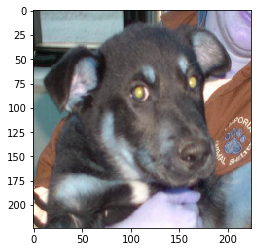

In [ ]:
random.shuffle(test_data)
test_x = []
test_y = []
for features, label in test_data:
    test_x.append(features)
    test_y.append(label)
test_x = np.array(test_x).reshape(-1, 224, 224, 3)
print(test_x.shape)
test_y = np.array(test_y)
print(test_y.shape)
test_x = test_x/255.0
plt.imshow(test_x[0])

In [ ]:
prediction = my_VGG16.predict_classes(test_x)data science internship london 2020
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix(test_y,prediction)

array([[ 0, 50],
       [ 0, 50]])

In [ ]:
accuracy_score(test_y,prediction)

0.56